<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [4]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


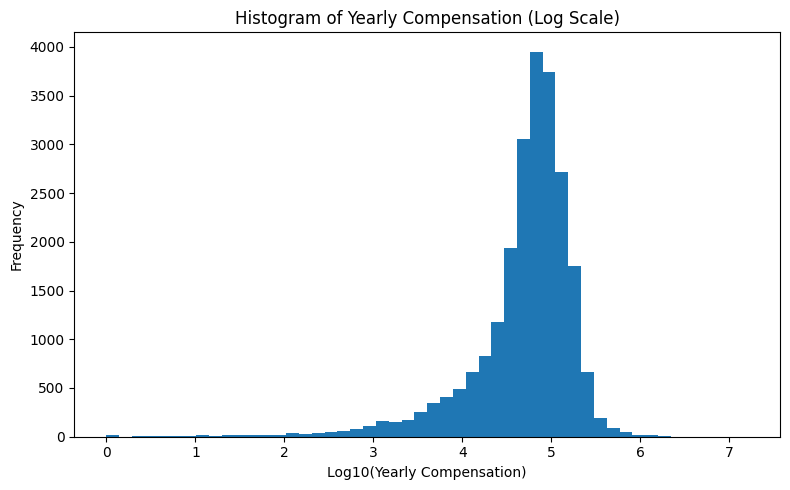

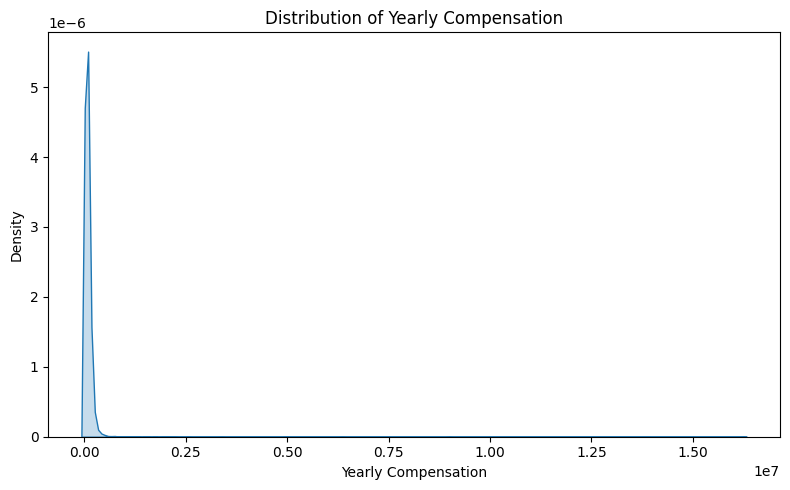

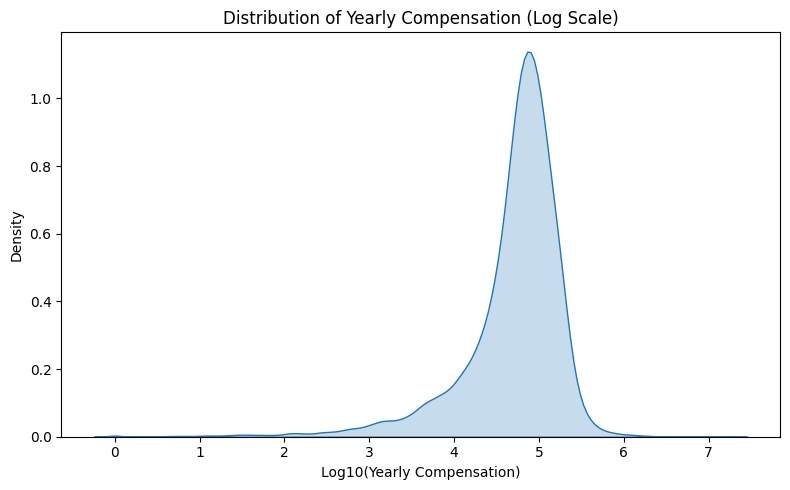

In [9]:
## Write your code here
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()
##Histogram with log scale

plt.figure(figsize=(8,5))
plt.hist(np.log10(comp), bins=50)
plt.title('Histogram of Yearly Compensation (Log Scale)')
plt.xlabel('Log10(Yearly Compensation)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##Distribution plot (KDE)

plt.figure(figsize=(8,5))
sns.kdeplot(comp, fill=True)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

##KDE on log scale
plt.figure(figsize=(8,5))
sns.kdeplot(np.log10(comp), fill=True)
plt.title('Distribution of Yearly Compensation (Log Scale)')
plt.xlabel('Log10(Yearly Compensation)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()



##The histogram and distribution plots show that yearly compensation is heavily right-skewed, with a large concentration of respondents earning lower to mid-range salaries and 
##a small number of very high earners. Applying a logarithmic transformation reveals a more balanced distribution and highlights the spread of compensation more clearly. 
##This indicates that extreme values significantly influence the raw distribution.

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [10]:
## Write your code here
# Ensure compensation is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_comp_full_time = full_time_df['ConvertedCompYearly'].median()
print(f"Median yearly compensation (Full-time employed): ${median_comp_full_time:,.2f}")


Median yearly compensation (Full-time employed): $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1200x600 with 0 Axes>

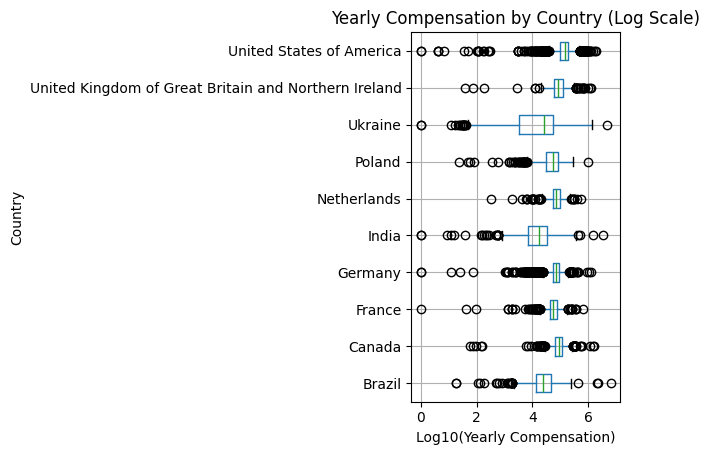

In [18]:
## Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_country = df[['Country', 'ConvertedCompYearly']].dropna()

# Limit to top countries for readability
top_countries = df_country['Country'].value_counts().head(10).index
df_country = df_country[df_country['Country'].isin(top_countries)]

import numpy as np
import matplotlib.pyplot as plt

df_country['LogComp'] = np.log10(df_country['ConvertedCompYearly'])

plt.figure(figsize=(12,6))
df_country.boxplot(
    column='LogComp',
    by='Country',
    vert=False
)
plt.title('Yearly Compensation by Country (Log Scale)')
plt.suptitle('')
plt.xlabel('Log10(Yearly Compensation)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [21]:
## Write your code here
##Prepare the compensation column
# Ensure ConvertedCompYearly is numeric
df['ConvertedCompYearly'] = pd.to_numeric(
    df['ConvertedCompYearly'], errors='coerce'
)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

##Calculate IQR and outlier bounds
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

df_refined = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
]

print("Original dataset size:", df.shape)
print("Refined dataset size:", df_refined.shape)
print("Rows removed as outliers:", df.shape[0] - df_refined.shape[0])

##No extreme outliers
comp_clean = df_refined['ConvertedCompYearly']

Q1_c = comp_clean.quantile(0.25)
Q3_c = comp_clean.quantile(0.75)
IQR_c = Q3_c - Q1_c

lower_c = Q1_c - 1.5 * IQR_c
upper_c = Q3_c + 1.5 * IQR_c

comp_clean[(comp_clean < lower_c) | (comp_clean > upper_c)].shape[0]

Original dataset size: (65437, 114)
Refined dataset size: (22457, 114)
Rows removed as outliers: 42980


245

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


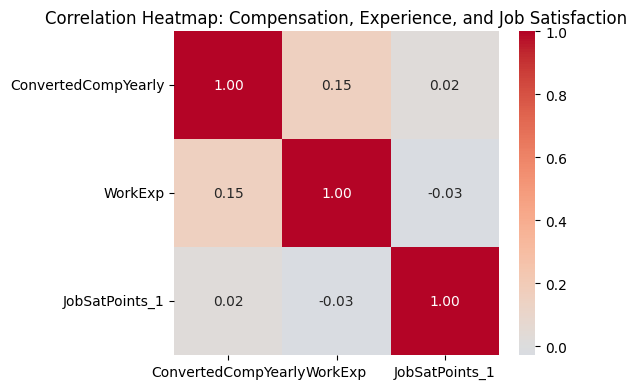

In [22]:
## Write your code here

# Select relevant columns
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Convert to numeric safely
df_corr = df[cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_corr = df_corr.dropna()
corr_matrix = df_corr.corr(method='pearson')
corr_matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0
)

plt.title('Correlation Heatmap: Compensation, Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()

##Interpretation 
##The heatmap shows the relationships between yearly compensation, work experience, and job satisfaction.
##ConvertedCompYearly has a positive correlation with WorkExp, indicating that compensation tends to increase with experience. 
##The correlation between compensation and job satisfaction appears weaker, suggesting that higher pay does not necessarily translate to higher job satisfaction. Work experience 
##and job satisfaction also show a weak relationship, indicating that satisfaction is influenced by factors beyond experience alone

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


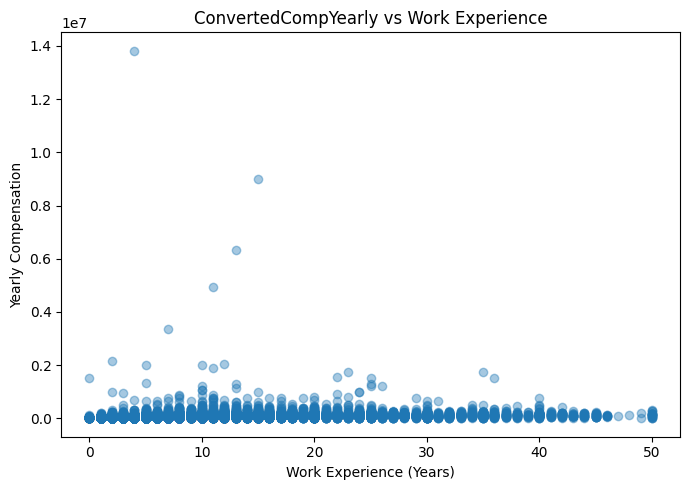

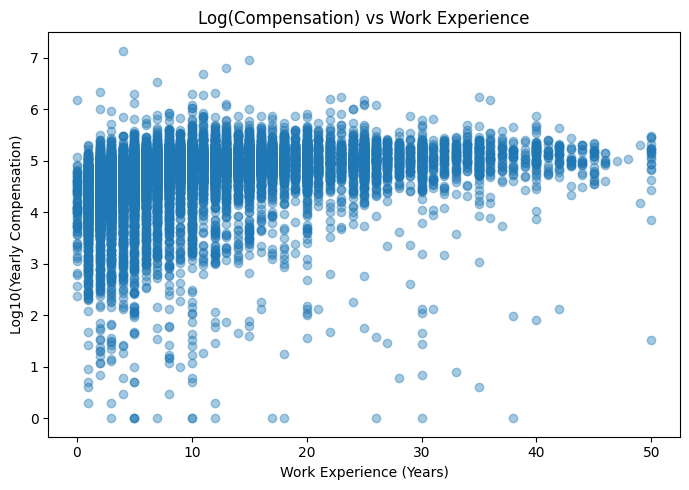

In [24]:
## Write your code here
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

df_scatter = df[cols].apply(pd.to_numeric, errors='coerce').dropna()
plt.figure(figsize=(7,5))
plt.scatter(df_scatter['WorkExp'], df_scatter['ConvertedCompYearly'], alpha=0.4)
plt.title('ConvertedCompYearly vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')
plt.tight_layout()
plt.show()

##Log scaled
plt.figure(figsize=(7,5))
plt.scatter(
    df_scatter['WorkExp'],
    np.log10(df_scatter['ConvertedCompYearly']),
    alpha=0.4
)
plt.title('Log(Compensation) vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Log10(Yearly Compensation)')
plt.tight_layout()
plt.show()


# Select and clean required columns
df_scatter = df[['ConvertedCompYearly', 'JobSatPoints_1']].apply(
    pd.to_numeric, errors='coerce'
).dropna()
plt.figure(figsize=(7,5))
plt.scatter(
    df_scatter['JobSatPoints_1'],
    np.log10(df_scatter['ConvertedCompYearly']),
    alpha=0.4
)
plt.title('Log(Yearly Compensation) vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Log10(Yearly Compensation)')
plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
